In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [6]:
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100, 1000]}
lasso_params = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100]}


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target  # House price

# Define features and target
X = df.drop(columns=["Target"])
y = df["Target"]

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, scoring="neg_mean_squared_error", cv=5)
ridge_grid.fit(X_train, y_train)

# Best Alpha for Ridge
best_ridge_alpha = ridge_grid.best_params_["alpha"]
best_ridge_mse = -ridge_grid.best_score_

print(f"Best Ridge Alpha: {best_ridge_alpha}")
print(f"Best Ridge MSE: {best_ridge_mse:.2f}")


Best Ridge Alpha: 10
Best Ridge MSE: 0.52


In [9]:
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, lasso_params, scoring="neg_mean_squared_error", cv=5)
lasso_grid.fit(X_train, y_train)

# Best Alpha for Lasso
best_lasso_alpha = lasso_grid.best_params_["alpha"]
best_lasso_mse = -lasso_grid.best_score_

print(f"Best Lasso Alpha: {best_lasso_alpha}")
print(f"Best Lasso MSE: {best_lasso_mse:.2f}")


Best Lasso Alpha: 0.001
Best Lasso MSE: 0.52


In [10]:
# Train Ridge with best alpha
ridge_best = Ridge(alpha=best_ridge_alpha)
ridge_best.fit(X_train, y_train)
y_pred_ridge_best = ridge_best.predict(X_test)

# Train Lasso with best alpha
lasso_best = Lasso(alpha=best_lasso_alpha)
lasso_best.fit(X_train, y_train)
y_pred_lasso_best = lasso_best.predict(X_test)

# Evaluate MSE
mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best)
mse_lasso_best = mean_squared_error(y_test, y_pred_lasso_best)

print(f"Final Ridge Regression MSE: {mse_ridge_best:.2f}")
print(f"Final Lasso Regression MSE: {mse_lasso_best:.2f}")


Final Ridge Regression MSE: 0.56
Final Lasso Regression MSE: 0.55


C:\Users\HP\AppData\Local\Temp\ipykernel_44052\560184323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, palette="Blues")


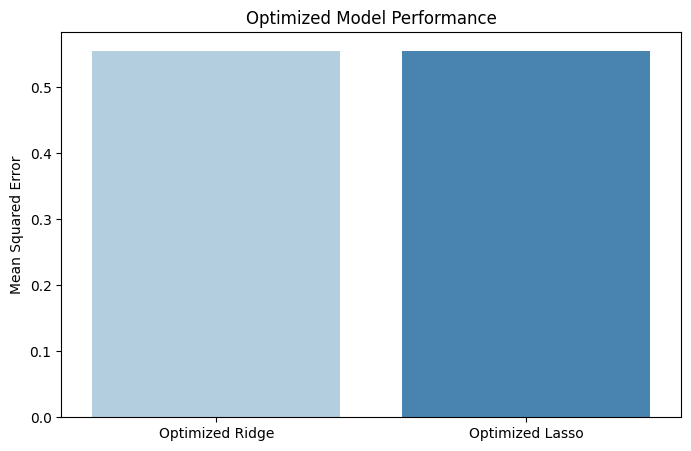

In [11]:
# Compare MSE values
models = ["Optimized Ridge", "Optimized Lasso"]
mse_values = [mse_ridge_best, mse_lasso_best]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=mse_values, palette="Blues")
plt.ylabel("Mean Squared Error")
plt.title("Optimized Model Performance")
plt.show()
